In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# MATLAB EXERCISES I

# OLD FAITHFUL DATA
# 1. Import and boxplot
# Initialize variables.

T = pd.read_csv('faithful.csv')

In [2]:
# Allocate imported array to column variable names
waiting = T['waiting']
duration = T['duration']
day = T['day']

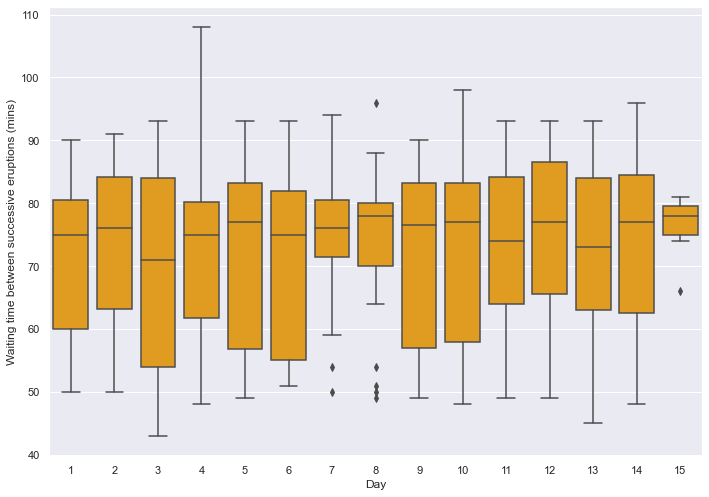

In [3]:
# boxplot by day 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='day', y='waiting', data=T, color='orange')
plt.xlabel('Day')
plt.ylabel('Waiting time between successive eruptions (mins)')
plt.show()

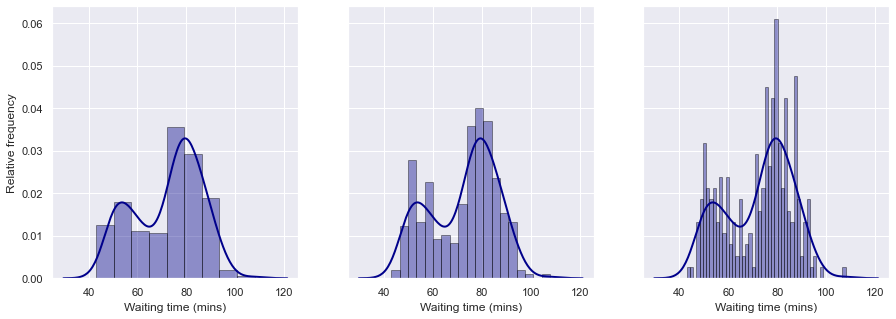

In [4]:
# 2. histograms with different number of bins, with kernel density smooth.

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

nbins = [10, 20, 50]

for bi in range(len(nbins)):
    sns.distplot(waiting, hist=True, kde=True, 
                 bins=np.linspace(start = min(waiting), stop = max(waiting), num = nbins[bi]),
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2},
                 ax=axes[bi])
    axes[bi].set(xlabel = 'Waiting time (mins)', ylabel = 'Relative frequency')

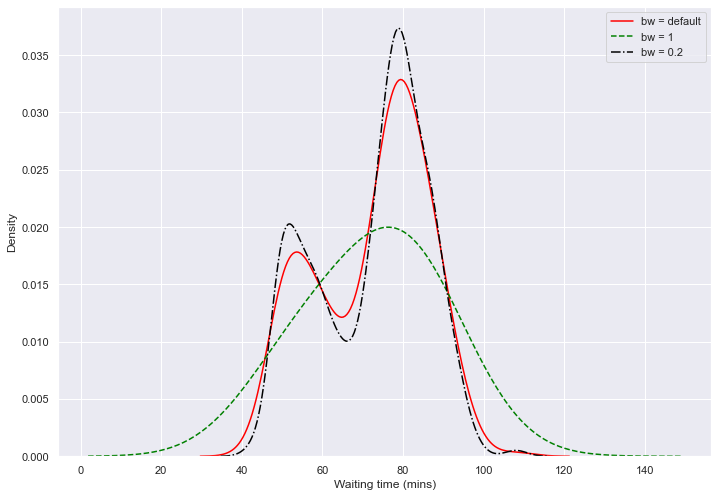

In [5]:
# Kernel density smooths with different bandwidths
# kernel density evaluated at 100 points across the range of the data.
sns.kdeplot(waiting, color='red', label='bw = default')
sns.kdeplot(waiting, bw= 1, color='green', linestyle = 'dashed', label = 'bw = 1')
sns.kdeplot(waiting, bw = 0.2, color='black', linestyle = 'dashdot', label = 'bw = 0.2')
plt.xlabel('Waiting time (mins)')
plt.legend()
plt.show()

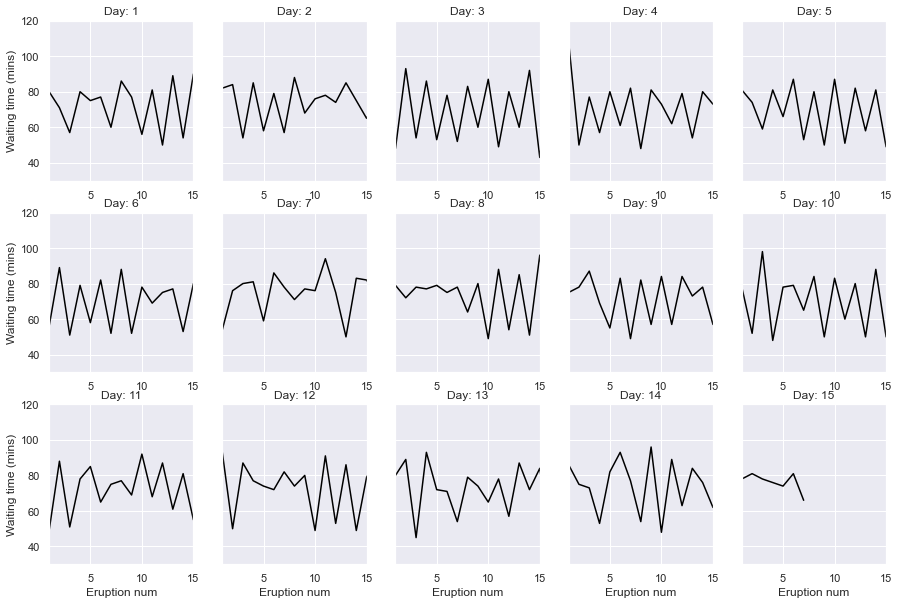

In [6]:
# 3. Plots of successive waiting times by day: subplots and axis limits
# plot daily data 
# need day as numeric

fig, axes = plt.subplots(3, 5, figsize=(15, 10), sharey=True)
for day in range(15):
    loc = T.loc[T['day']==day+1]
    p = sns.lineplot(data=loc, x=range(1,len(loc)+1), y='waiting', color = 'black',
                     ax=axes[divmod(day, 5)[0], divmod(day, 5)[1]]) # line plot
    p.set(ylim=(30, 120))
    p.set(xlim=(1, 15))
    p.set(ylabel='Waiting time (mins)')
    p.set(title='Day: ' + str(day+1))
    if day>9:
        p.set(xlabel='Eruption num')

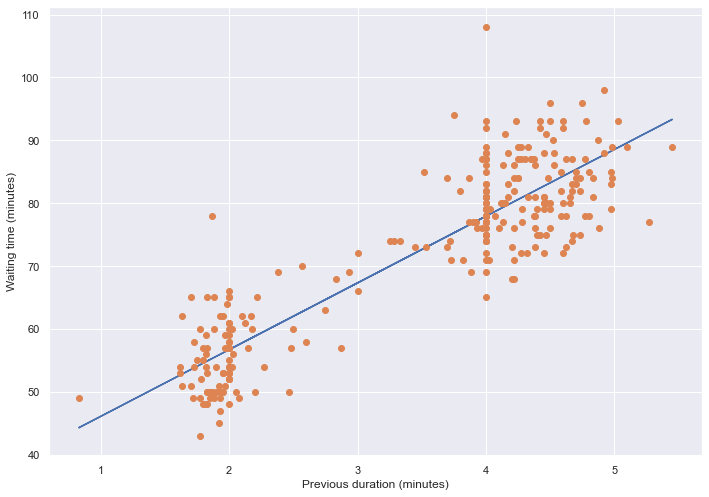

In [8]:
# 4. scatter plot with linear fit
# do linear regression
from statsmodels.tsa.tsatools import lagmat
lagmatrix = lagmat(duration, maxlag=1, use_pandas=True)['duration.L.1']
m, b = np.polyfit(lagmatrix[1:], waiting[1:], 1)

# fit linear regression
plt.plot(lagmatrix[1:], m*lagmatrix[1:] + b)
plt.plot(lagmatrix[1:], waiting[1:], 'o')
plt.xlabel('Previous duration (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.show()

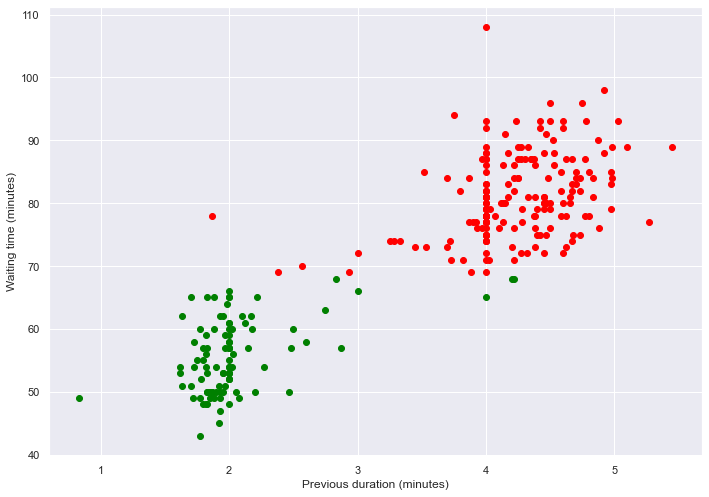

In [9]:
# 5. k means clustering lagged duration or lagged waiting time and waiting time to next eruption
from sklearn.cluster import KMeans
d = {'lagduration': lagmatrix[1:], 'waiting': waiting[1:]}
X = pd.DataFrame(data=d)
K = 2
C = KMeans(n_clusters=K, random_state=0).fit(X)

for i in range(K):
    label0 = X.loc[C.labels_==0]
    label1 = X.loc[C.labels_==1]

    
plt.scatter(x=label0['lagduration'], y=label0['waiting'], color = 'red')
plt.scatter(x=label1['lagduration'], y=label1['waiting'], color = 'green')
plt.xlabel('Previous duration (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.show()